# Datasience Machine LEarning 
Academic year 2020/2021

Student: 
- Nguyen Chi Cong
- Trung
- Nguyen Quoc Khanh

---


# ** Data process on UCI Default of Credit Card Clients Dataset**


# Importing Libraries to display 

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di 



# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show/hide code</button>''', raw=True)


di.display_html("""

<style>
#customers {
  font-family: "Trebuchet MS", Arial, Helvetica, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

#customers td, #customers th {
  border: 1px solid #ddd;
  padding: 8px;
  text-align: center;
}

.content:nth-child(even){background-color: #f2f2f2;}
.content:hover{background-color:#C7C9C7;}


#customers th {
  padding-top: 12px;
  padding-bottom: 12px;
  text-align: center;
  
  color: white;
}

.first{
    background-color: #4B6D80;
    font-size:20px;
}
.second{
    background-color: #71A4BF;
}

.third{
    background-color: #B1D0E8;
    color: white;
}

#customers a {
    color: black;
    padding: 10px 20px;
    text-align: center;
    text-decoration: none;
        text-decoration-line: none;
        text-decoration-style: solid;
        text-decoration-color: currentcolor;
        text-decoration-thickness: auto;
    display: inline-block;
    font-size: 16px;
    margin-left: 20px;
    
}

</style>

""", raw=True)


Show/hide code

In [2]:
di.display_html("""
<table id="customers">
    <thead class="first">
        <th colspan=5>Table of contents</th>
    <tbody>
        <tr>
            <td colspan=5 class="cell"><a href='#Importing-Require'>Importing Require Libraries"</a></td>
        </tr>
          <tr>
            <td colspan=5 class="cell"><a href='#DataLoad'>Load</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#DataInsights'>Exploration Data - Data Insights</a></td>
        </tr>
         
        <tr>
            <td colspan=5 class="cell"><a href='#SummaryStatistics'>Exploration Data - Summary Statistics</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#DataLoad'>Data Cleaning</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#DataVisualization'>Data Visualization</a></td>
        </tr>
        <tr>
            <td class="cell"><a href='#missing-value'>check missing values</a></td>
            <td class="cell"><a href='#correlation'>correlation</a></td>
            <td class="cell"><a href='#'>Correlation Heat Maps - Seaborn</a></td>
            <td class="cell"><a href='#Outliers'>Outliers</a></td>
            <td class="cell"><a href='#distribution-Skewness'>distribution-Skewness</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Prediction'>Prediction Age and pay - Linear Regression</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Comments-on-results'>Comments on results</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#References'>References</a></td>
        </tr>
    </tbody>
</table>
""", raw=True)

Table of contents 
 
 
 Importing Require Libraries" 
 
 
 Load 
 
 
 Exploration Data - Data Insights 
 
 
 
 Exploration Data - Summary Statistics 
 
 
 Data Cleaning 
 
 
 Data Visualization 
 
 
 check missing values 
 correlation 
 Correlation Heat Maps - Seaborn 
 Outliers 
 distribution-Skewness 
 
 
 Prediction Age and pay - Linear Regression 
 
 
 Comments on results 
 
 
 References

# Importing Require Libraries"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # Predict
import statsmodels.formula.api as smf #Predict 

from sklearn import datasets, linear_model #Learn
from sklearn.metrics import mean_squared_error #Learn


%matplotlib inline

- " %matplotlib inline " makes life easy by returning output plots without needing to write plt.show() code everytime after each plot!

In [4]:
df = pd.read_csv('dataset/credit_cards_dataset.csv',sep=',')
df.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


- Original data is seperated by delimiter " , " in given dataset
- " .head() " returns first five observations of the dataset

# Data Insights

In [5]:
df.shape 

(30000, 25)

- dataset comprises of 30000 observations and 25 chracteriestics 
- out of which one is dependent variable and rest 25 are independent variables - physicochemical characteristics

In [6]:
df.columns.values 

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

- Label of each column

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- Data has float64, integer64 values
- No variable column has null/missing values ==> No need to clean and preprocessing ( by easy way)

# Summary Statistics

In [8]:
df.describe() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#Key Observations - 
- Mean value is less than median value of each column represented by 50%(50th percentile) in index column.
- ..
- .. 
- 
- --
- --


# Understanding Target variable

In [9]:
df.AGE.unique() 


array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

- "AGE" score scale ranges from 24 to  79 ;where 24  youngest and 79 being the oldest.


In [10]:
df.LIMIT_BAL.unique() 

array([  20000.,  120000.,   90000.,   50000.,  500000.,  100000.,
        140000.,  200000.,  260000.,  630000.,   70000.,  250000.,
        320000.,  360000.,  180000.,  130000.,  450000.,   60000.,
        230000.,  160000.,  280000.,   10000.,   40000.,  210000.,
        150000.,  380000.,  310000.,  400000.,   80000.,  290000.,
        340000.,  300000.,   30000.,  240000.,  470000.,  480000.,
        350000.,  330000.,  110000.,  420000.,  170000.,  370000.,
        270000.,  220000.,  190000.,  510000.,  460000.,  440000.,
        410000.,  490000.,  390000.,  580000.,  600000.,  620000.,
        610000.,  700000.,  670000.,  680000.,  430000.,  550000.,
        540000., 1000000.,  530000.,  710000.,  560000.,  520000.,
        750000.,  640000.,   16000.,  570000.,  590000.,  660000.,
        720000.,  327680.,  740000.,  800000.,  760000.,  690000.,
        650000.,  780000.,  730000.])

In [11]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
# - This tells us count of each MARRIAGE score in descending order.
# - "MARRIAGE" has most values concentrated in the categories 2, 1 .
# - Only a few observations made for the categories 3 & 0 
## DATA CLEANING
### On the Dataset description , we don't have "MARRIAGE Status" = 0, so we need to clean up these values

df = df.loc[df["MARRIAGE"].isin([1,2])]

df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
# Data Visualization

# To check missing values

<AxesSubplot:>

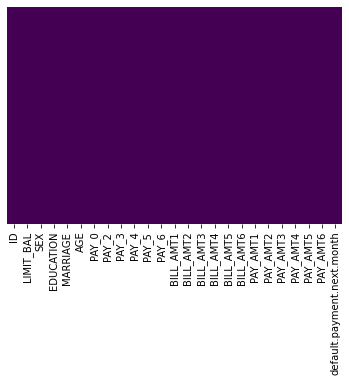

In [14]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

- Dataset has no missing values.
- If there were any, you would've noticed in figure represented by different colour shade on purple background.
- Do try it out with other dataset which has missing values,you'll see the difference. 


# To check correlation

<AxesSubplot:>

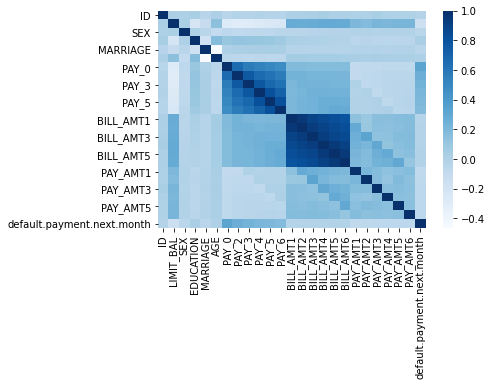

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

- Dark shades represents positive correlation while lighter shades represents negative correlation.
- If we set annot=True, you'll get values by which features are correlated to each other in grid-cells as below 

<AxesSubplot:>

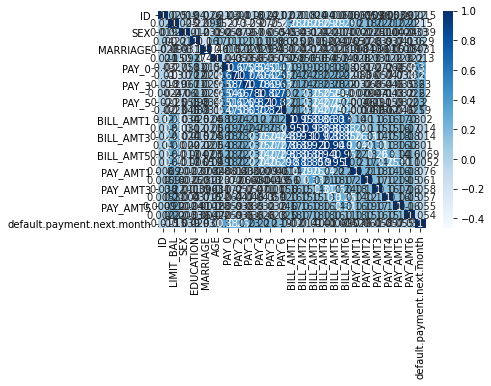

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

<AxesSubplot:>

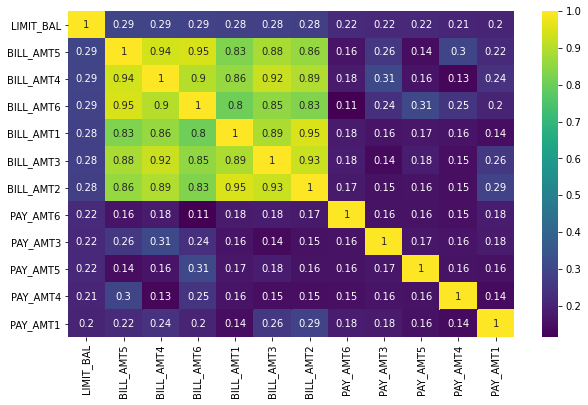

In [17]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'LIMIT_BAL')['LIMIT_BAL'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

<ipython-input-18-d9feafa2092a>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
/home/tristannguyen/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tristannguyen/.local/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-18-d9feafa2092a>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplo

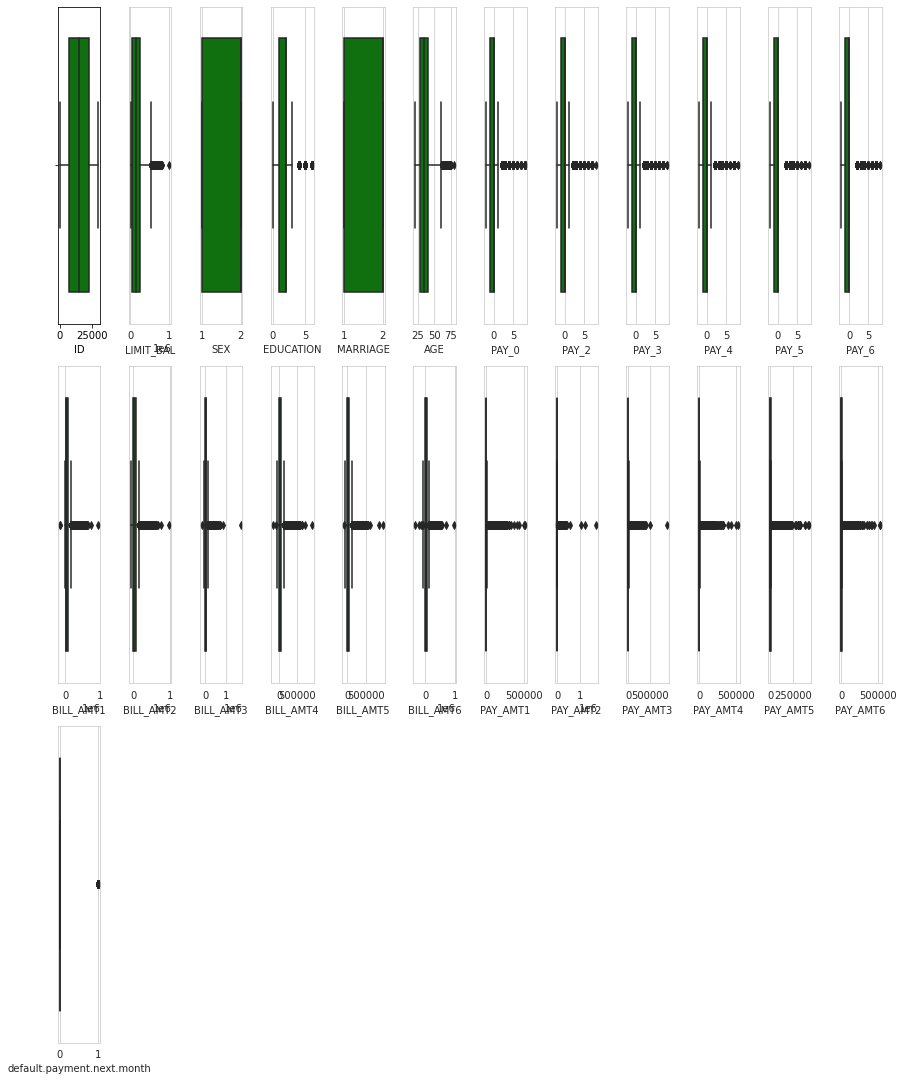

In [18]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()


- ..
- ..
- ..
- ..
- ..


# To check distribution-Skewness

<ipython-input-19-6b7cfecfd1fa>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
/home/tristannguyen/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-19-6b7cfecfd1fa>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
/home/tristannguyen/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated f

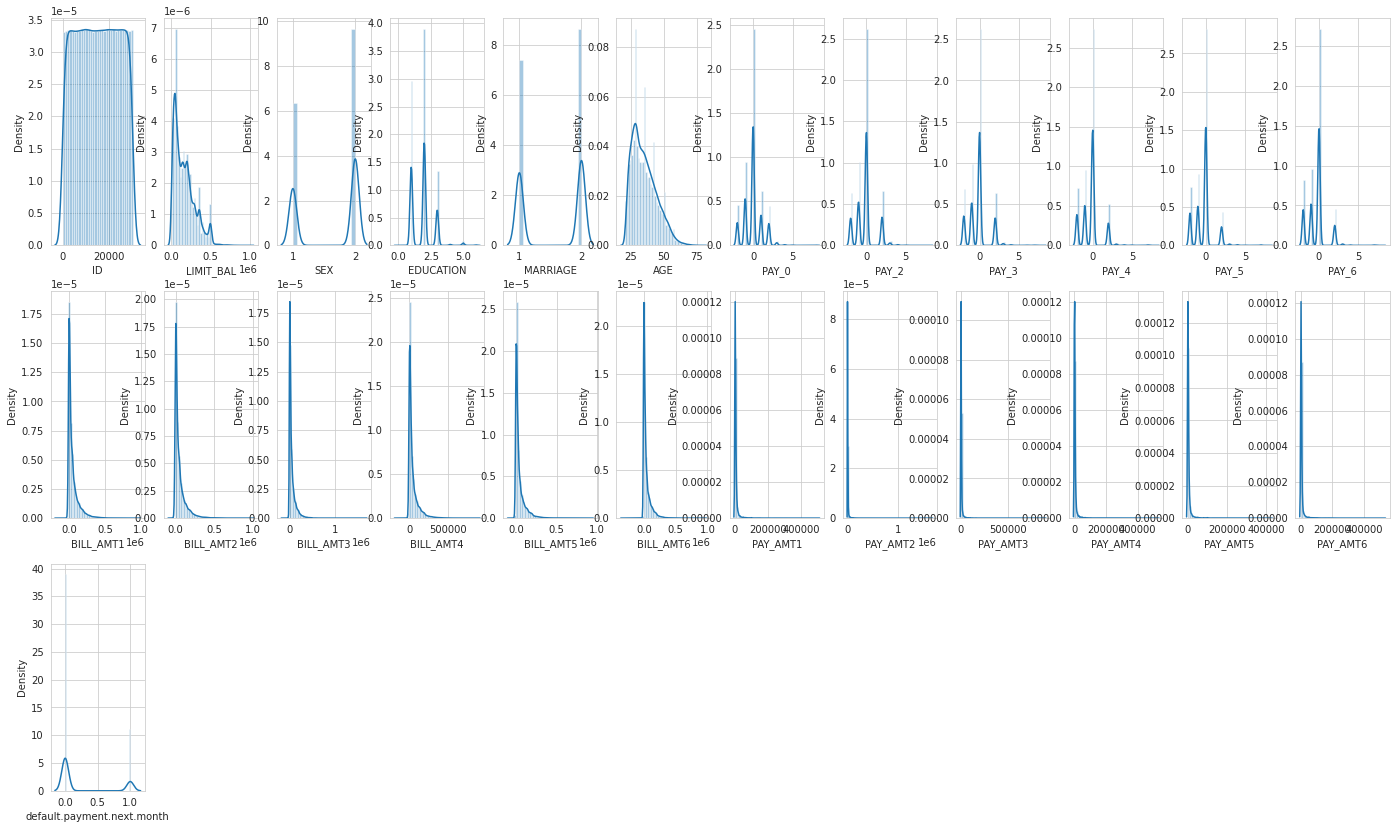

In [19]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 


- "pH" column appears to be normally distributed
- remaining all independent variables are right skewed/positively skewed.   

# Predicting  AGE and PAY : Linear Regression
## 5.1 80-20 Split of Training and Hold-Out Data ¶


In [20]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df, test_size=0.2, random_state=4) 

In [21]:
results1 = smf.ols('AGE ~ PAY_0 + PAY_2 + PAY_3 + PAY_4 ', data=df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    AGE   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.21
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           1.00e-21
Time:                        20:03:56   Log-Likelihood:            -1.0767e+05
No. Observations:               29623   AIC:                         2.153e+05
Df Residuals:                   29618   BIC:                         2.154e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3189      0.055    647.589      0.0

In [22]:
y = train["AGE"]
cols = ["PAY_0","PAY_2","PAY_3","PAY_4"]

X=train[cols]

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [24]:
ytrain_pred = regr.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 84.10


In [25]:
ytest = test["AGE"]
cols = ["PAY_0","PAY_2","PAY_3","PAY_4"]

Xtest=test[cols]

In [26]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 83.84
